In [4]:
from collections import Counter

def count_words(text):
    """
    This function takes a string of text and returns a dictionary with the count of each word in the text.
    
    :param text: str, input text
    :return: dict, word counts
    """
    # Normalize the text to lowercase and split into words
    # Remove punctuation and split by whitespace
    import string
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.lower().split(" ")
    
    # Create a dictionary to hold word counts
    word_counts = Counter(words)
            
    return word_counts

print(count_words("Hello world! Hello everyone. This is a test."))

Counter({'hello': 2, 'world': 1, 'everyone': 1, 'this': 1, 'is': 1, 'a': 1, 'test': 1})


In [5]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [9]:
def read_book(file_path):
    """
    This function reads a book from a file and returns the text.
    
    :param file_path: str, path to the book file
    :return: str, text of the book
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().replace('\n', '').replace('\r', '').strip()
    return text

romeo_and_juliet = read_book("English/shakespeare/Romeo and Juliet.txt")
print(count_words(romeo_and_juliet))
print(romeo_and_juliet.find("What's in a name?"))

Counter({'': 12187, 'the': 838, 'and': 783, 'to': 613, 'i': 580, 'of': 527, 'a': 512, 'in': 374, 'is': 369, 'that': 360, 'my': 360, 'you': 358, 'with': 290, 'not': 282, 'thou': 277, 'this': 269, 'me': 265, 'for': 254, 'it': 244, 'be': 230, 'but': 189, 'as': 166, 'what': 165, 'thy': 164, 'rom': 163, 'her': 156, 'will': 154, 'o': 154, 'nurse': 150, 'so': 149, 'romeo': 143, 'or': 140, 'his': 139, 'thee': 138, 'love': 137, 'have': 130, 'by': 127, 'he': 120, 'jul': 117, 'she': 115, 'no': 113, 'all': 113, 'shall': 112, 'your': 111, 'do': 103, 'if': 101, 'him': 100, 'come': 99, 'from': 96, 'are': 88, 'an': 88, 'friar': 88, 'on': 88, 'then': 84, 'ill': 84, 'at': 82, 'good': 82, 'here': 80, 'now': 79, 'go': 76, 'we': 74, 'man': 72, 'which': 70, 'death': 69, 'well': 69, 'project': 68, 'lady': 68, 'more': 68, 'night': 68, 'there': 66, 'our': 65, 'may': 64, 'how': 64, 'ben': 64, 'hath': 64, 'juliet': 62, 'they': 62, 'mer': 62, 'one': 61, 'am': 60, 'enter': 58, 'some': 58, 'up': 57, 'too': 57, 'sir

In [11]:
def word_stats(word_counts):
    """
    This function takes a dictionary of word counts and returns the number of unique words and their counts.

    :param word_counts: dict, word counts
    :return: tuple, number of unique words and their counts
    """
    # Get the most common words
    num_unique = len(word_counts)
    counts = word_counts.values()
    
    return (num_unique, counts)
word_counts = count_words(romeo_and_juliet)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

4475 40776


In [14]:
romeo_and_juliet_german = read_book("German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(romeo_and_juliet_german)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

7241 20311


In [23]:
import os
import pandas as pd

book_dir = "./books"



def read_all_books(book_dir):
    """
    This function reads all book files in a directory and returns a dataframe with information.
    
    :param book_dir: str, path to the directory containing book files
    :return: dataframe
    """
    stats = pd.DataFrame(columns=["language", "autho", "title", "length", "unique"])
    title_num = 1
    # recursively search for txt files in the directory
    for language in os.listdir(book_dir):
        for author in os.listdir(os.path.join(book_dir, language)):
            for title in os.listdir(os.path.join(book_dir, language, author)):
                file_path = os.path.join(book_dir, language, author, title)
                text = read_book(file_path)
                word_counts = count_words(text)
                (num_unique, counts) = word_stats(word_counts)
                stats.loc[title_num] = [language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique]
                title_num += 1
    return stats

books = read_all_books(book_dir)
print(books.head())

  language     autho                                              title  \
1   German  Schiller                                 Wallensteins Lager   
2   German  Schiller                              die braut von messina   
3   German  Schiller  Der Parasit, oder die Kunst, sein GlÅck zu ma...   
4   German  Schiller              Die Verschwîrung des Fiesco zu Genua   
5   German  Schiller                                   Kabale und Liebe   

   length  unique  
1   15443    4081  
2   26482    6145  
3   20450    5785  
4   31128    9545  
5   30929    9239  


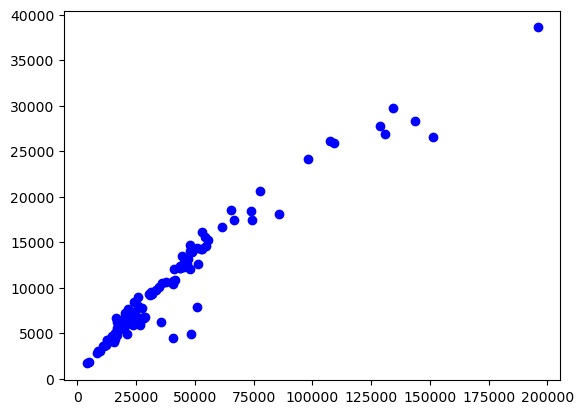

In [26]:
# install matplotlib using conda if not already installed
# try:
#     import matplotlib.pyplot as plt
# except ImportError:
#     import os
#     os.system("conda install matplotlib -y")
#     import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.plot(books["length"], books["unique"], "bo")

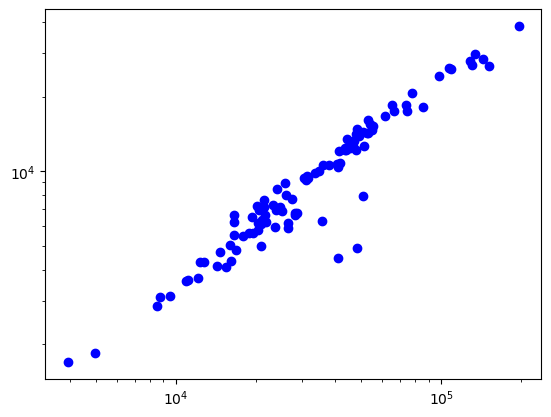

In [27]:
plt.loglog(books["length"], books["unique"], "bo")

In [28]:
books[books["language"] == "English"]

,language,autho,title,length,unique
35,English,Shakespeare,Othello,26590,5898
36,English,Shakespeare,Richard III,48315,4888
37,English,Shakespeare,The Merchant of Venice,20949,4978
38,English,Shakespeare,A Midsummer Night's Dream,16103,4345
39,English,Shakespeare,Macbeth,16874,4780
40,English,Shakespeare,Hamlet,28551,6776
41,English,Shakespeare,Romeo and Juliet,40776,4475


Text(0, 0.5, 'Number of unique words')

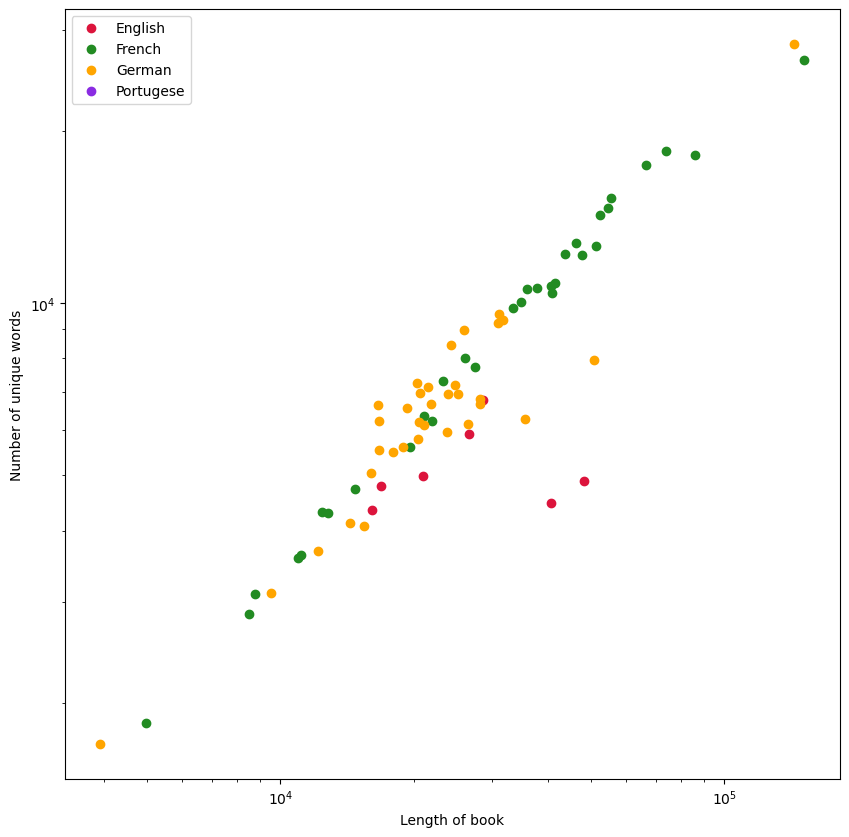

In [ ]:
plt.figure(figsize=(10, 10))

subset = books[books["language"] == "English"]
plt.loglog(subset.length, subset.unique, "o", label="English", color="crimson")

subset = books[books["language"] == "French"]
plt.loglog(subset.length, subset.unique, "o", label="French", color="forestgreen")

subset = books[books["language"] == "German"]
plt.loglog(subset.length, subset.unique, "o", label="German", color="orange")

subset = books[books["language"] == "Portugese"]
plt.loglog(subset.length, subset.unique, "o", label="Portugese", color="blueviolet")

plt.legend()
plt.xlabel("Length of book")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")